In [1]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import LeNet

import matplotlib.pyplot as plt

# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 2

In [3]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# download and create datasets
train_dataset = datasets.MNIST(root='mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

train_dataset.targets[train_dataset.targets % 5 == 0] = 0
train_dataset.targets[train_dataset.targets % 5 != 0] = 1

valid_dataset = datasets.MNIST(root='mnist_data', 
                               train=False, 
                               transform=transforms)

valid_dataset.targets[valid_dataset.targets % 5 == 0] = 0
valid_dataset.targets[valid_dataset.targets % 5 != 0] = 1

# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=False)

In [4]:
torch.manual_seed(RANDOM_SEED)

model = LeNet.LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [5]:
model, optimizer, losses = LeNet.training_loop(model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS, DEVICE)

18:08:29 --- Epoch: 0	Train loss: 0.0968	Valid loss: 0.0389	Train accuracy: 98.63	Valid accuracy: 98.60
18:25:05 --- Epoch: 1	Train loss: 0.0342	Valid loss: 0.0266	Train accuracy: 99.18	Valid accuracy: 98.97
18:41:49 --- Epoch: 2	Train loss: 0.0237	Valid loss: 0.0201	Train accuracy: 99.51	Valid accuracy: 99.26
18:58:26 --- Epoch: 3	Train loss: 0.0180	Valid loss: 0.0192	Train accuracy: 99.62	Valid accuracy: 99.30
19:15:11 --- Epoch: 4	Train loss: 0.0137	Valid loss: 0.0216	Train accuracy: 99.64	Valid accuracy: 99.24
19:31:56 --- Epoch: 5	Train loss: 0.0116	Valid loss: 0.0188	Train accuracy: 99.67	Valid accuracy: 99.35
19:48:38 --- Epoch: 6	Train loss: 0.0090	Valid loss: 0.0152	Train accuracy: 99.81	Valid accuracy: 99.52
20:05:16 --- Epoch: 7	Train loss: 0.0073	Valid loss: 0.0175	Train accuracy: 99.86	Valid accuracy: 99.49
20:21:53 --- Epoch: 8	Train loss: 0.0066	Valid loss: 0.0169	Train accuracy: 99.89	Valid accuracy: 99.44
20:38:32 --- Epoch: 9	Train loss: 0.0060	Valid loss: 0.0198	Trai

In [6]:
SAVE_PATH = 'trained_model/mnist_mod_5_original'
torch.save(model.state_dict(), SAVE_PATH)

In [7]:
def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # change the plot style to default
    plt.style.use('default')

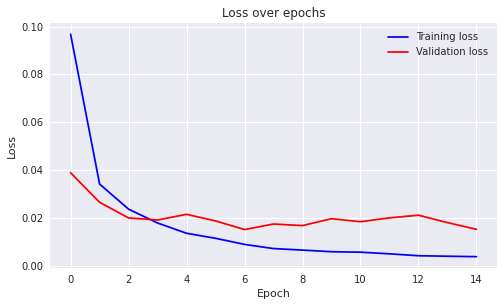

In [8]:
plot_losses(losses[0], losses[1])

In [9]:
ROW_IMG = 10
N_ROWS = 5

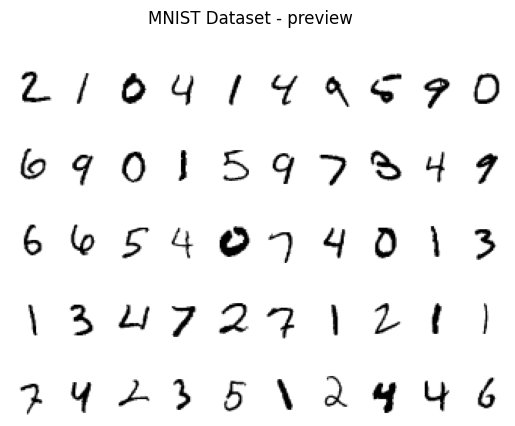

In [10]:
fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.data[index], cmap = 'gray_r')
fig.suptitle('MNIST Dataset - preview');

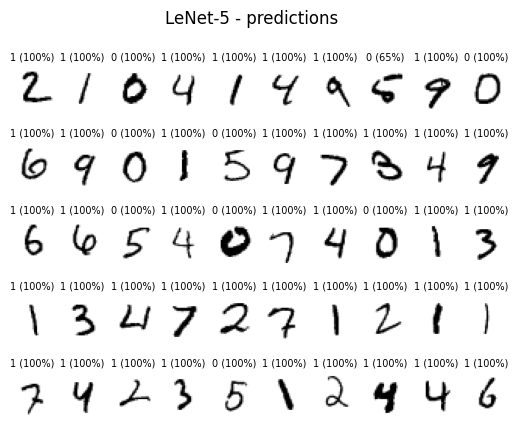

In [11]:
fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.data[index], cmap='gray_r')
    
    with torch.no_grad():
        model.eval()
        y_hat = model(valid_dataset[index][0].unsqueeze(0))
        probs = F.softmax(y_hat, dim=1)
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    
    plt.title(title, fontsize=7)
fig.suptitle('LeNet-5 - predictions');